### 1. Generalized SLSQP Algorithm for n Uncorrelated Stocks

In [1]:
import numpy as np
from scipy.optimize import minimize

# Input the number of stocks in the portfolio
num_stocks = int(input("Enter the number of stocks in the portfolio: "))

# Create a list of expected stock returns
returns = [float(input(f"Enter the expected return of Stock {i + 1}: ")) 
           for i in range(num_stocks)]

# Create a list of stock standard deviations
std_devs = [float(input(f"Enter the standard deviation of Stock {i + 1}: ")) 
            for i in range(num_stocks)]

# Input the portfolio risk tolerance
risk_tolerance = float(input("Enter the risk tolerance: "))

# Define the objective function to maximize (expected return)
def maximize_expected_return(weights):
    return -np.dot(weights, returns)

# Define the budget constraint
def budget_constraint(weights):
    return np.sum(weights) - 1

# Define the risk constraint
def risk_constraint(weights):
    portfolio_risk = np.dot(np.square(weights), np.square(std_devs))
    return - (portfolio_risk - risk_tolerance ** 2)

# Specify the initial guess for weights
initial_weights = np.zeros(num_stocks)

# Specify bounds for weights
weight_bounds = [[0, 1]] * num_stocks

# Define the constraints as a list of dictionaries
constraints = [{'type': 'eq', 'fun': budget_constraint}, 
               {'type': 'ineq', 'fun': risk_constraint}]

# Execute the optimization
result = minimize(maximize_expected_return, initial_weights, method='SLSQP', 
                  constraints=constraints, bounds=weight_bounds, 
                  options={'ftol': 1e-6})

# Print results
print("\nOptimal stock weighting:")
print([round(weight, 5) for weight in result.x])
print("\nMaximum expected return, as a percentage:")
print(round(-result.fun, 5))

Enter the number of stocks in the portfolio: 2
Enter the expected return of Stock 1: 20
Enter the expected return of Stock 2: 30
Enter the standard deviation of Stock 1: 10
Enter the standard deviation of Stock 2: 20
Enter the risk tolerance: 15

Optimal stock weighting:
[0.26148, 0.73852]

Maximum expected return, as a percentage:
27.38516


### 2. Graph of Portfolio Risk as a Function of Proportion of Stock A

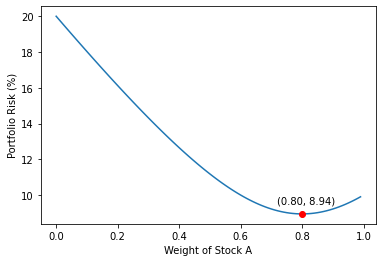

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Set the x-coordinates from 0 to 1 with a step size of 0.01
x = np.arange(0, 1, 0.01)

# Calculate the corresponding y-coordinates
y = np.sqrt(100 * x ** 2 + 400 * (1 - x) ** 2)

# Find the lowest point on the graph
lowest_point_idx = np.argmin(y)
lowest_point_x = x[lowest_point_idx]
lowest_point_y = y[lowest_point_idx]

# Set labels for the plot
plt.xlabel('Weight of Stock A')
plt.ylabel('Portfolio Risk (%)')

# Plot the points
plt.plot(x, y)

# Mark the lowest point on the graph
plt.plot(lowest_point_x, lowest_point_y, 'ro')

# Annotate the coordinates of the lowest point
plt.annotate(f'({lowest_point_x:.2f}, {lowest_point_y:.2f})', (lowest_point_x, lowest_point_y),
             textcoords="offset points", xytext=(4, 10), ha='center')

# Display the plot
plt.show()

### 3. Graph of Optimal Proportions of Stocks A and B Based on Portfolio Risk Tolerance

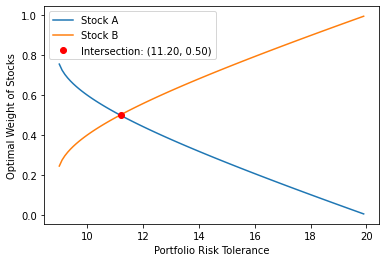

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x-coordinates from 9 to 20 with a step size of 0.1
x = np.arange(9, 20, 0.1)

# Calculate y-coordinates
y1 = (800 - np.sqrt(800 ** 2 - 4 * 500 * (400 - x ** 2))) / 1000
y2 = 1 - y1

# Find the coordinates of the intersection point
intersection_x = x[np.argmin(np.abs(y1 - y2))]
intersection_y = y1[np.argmin(np.abs(y1 - y2))]

# Plot the line for Stock A
plt.plot(x, y1, label='Stock A')

# Plot the line for Stock B
plt.plot(x, y2, label='Stock B')

# Plot the intersection point
plt.plot(intersection_x, intersection_y, 'ro')

# Set the labels for the x-axis and y-axis
plt.xlabel('Portfolio Risk Tolerance')
plt.ylabel('Optimal Weight of Stocks')

# Add a legend with the intersection point label
legend_label = f'Intersection: ({intersection_x:.2f}, {intersection_y:.2f})'
plt.legend(labels=['Stock A', 'Stock B', legend_label], loc='best')

# Display the plot
plt.show()

### 4. Graph of Maximum Portfolio Expected Return as a Function of Correlation Coefficient

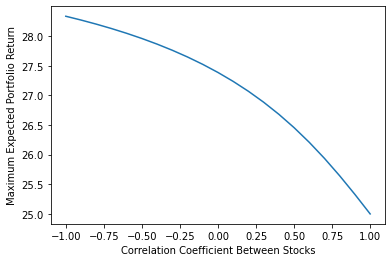

In [4]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

def maximize_return(correlation):
    # Define the objective function to maximize (expected return)
    def expected_return(weights):
        weight_a, weight_b = weights
        return -1 * (20 * weight_a + 30 * weight_b)    
    
    # Define the budget constraint
    def budget_constraint(weights):
        weight_a, weight_b = weights
        return weight_a + weight_b - 1

    # Define the risk constraint
    def risk_constraint(weights):
        weight_a, weight_b = weights
        return -(100 * weight_a ** 2 + 400 * weight_b ** 2 + \
                 2 * weight_a * weight_b * 10 * 20 * correlation - 225)
 
    # Specify the initial guess and bounds for weights
    initial_weights = [0, 0]
    weight_bounds = [[0, 1], [0, 1]]

    # Define the constraints as a list of dictionaries
    constraints = [
        {'type': 'eq', 'fun': budget_constraint},  
        {'type': 'ineq', 'fun': risk_constraint}
    ]

    # Execute the optimization to find the optimal weight for Stock A
    result = minimize(expected_return, initial_weights, method='SLSQP', 
                      constraints=constraints, bounds=weight_bounds,
                      options={'ftol': 1e-6})
  
    return -1 * result.fun

# Generate correlation coefficients from -1 to 1 with a step size of 0.1
x = np.round(np.arange(-1, 1.1, 0.1), 1)

# Calculate the corresponding maximum expected return
y = [round(maximize_return(coeff), 5) for coeff in x]

# Plotting the results
plt.xlabel('Correlation Coefficient Between Stocks')
plt.ylabel('Maximum Expected Portfolio Return')

plt.plot(x, y)
plt.show()

### 5. Graph of Optimal Stock Weights as a Function of the Correlation Coefficient

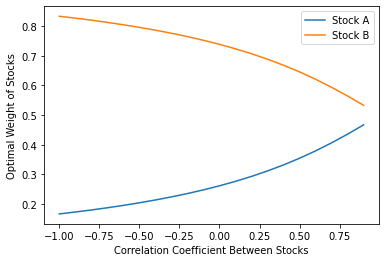

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize

def optimize_portfolio(correlation):
    # Define the objective function to maximize (expected return)
    def expected_return(weights):
        weight_a, weight_b = weights
        return -1 * (20 * weight_a + 30 * weight_b)

    # Define the budget constraint
    def budget_constraint(weights):
        weight_a, weight_b = weights
        return weight_a + weight_b - 1

    # Define the risk constraint
    def risk_constraint(weights):
        weight_a, weight_b = weights
        return -(100 * weight_a ** 2 + 400 * weight_b ** 2 + \
                 2 * weight_a * weight_b * 10 * 20 * correlation - 225)

    # Specify the initial guess and bounds for weights
    initial_weights = [0, 0]
    weight_bounds = [[0, 1], [0, 1]]

    # Define the constraints as a list of dictionaries
    constraints = [
        {'type': 'eq', 'fun': budget_constraint},  
        {'type': 'ineq', 'fun': risk_constraint}
    ]

    # Execute the optimization to find the optimal weight for Stock A
    result = minimize(expected_return, initial_weights, method='SLSQP', 
                      constraints=constraints, bounds=weight_bounds,
                      options={'ftol': 1e-6})

    return result.x[0]

# Generate correlation coefficients from -1 to 1 with a step size of 0.1
x = np.arange(-1, 1, 0.1)

# Calculate optimal weights for Stock A and B
weights_a = [round(optimize_portfolio(coeff), 5) for coeff in x]
weights_b = [round(1 - weight, 5) for weight in weights_a]

# Plotting the results
plt.xlabel('Correlation Coefficient Between Stocks')
plt.ylabel('Optimal Weight of Stocks')

plt.plot(x, weights_a, label="Stock A")
plt.plot(x, weights_b, label="Stock B")

plt.legend()
plt.show()